In [1]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
import pandas as pd
import anndata
print(os.getcwd())
print(ROMA)

/home/az/Projects/01_Curie/05_pyROMA/pyROMA_shared
<class 'pyROMA.ROMA.ROMA'>


In [2]:
# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata

In [3]:
roma

scROMA

In [6]:
def save_ROMA_results(adata, path):
    # saves the adata to a path
    import pickle 
    d = adata.uns['ROMA']

    with open(f'{path}.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

    del adata.uns['ROMA']
    adata.write(f"{path}.h5ad")

    return

def load_ROMA_results(path):
    # loads the results into adata
    import pickle
    import scanpy as sc 

    with open(f'{path}.pickle', 'rb') as handle:
        d = pickle.load(handle)

    adata = sc.read_h5ad(f'{path}.h5ad')
    adata.uns['ROMA'] = d

    return adata

In [7]:
roma.adata

In [4]:
path_to_save = '/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pyroma_outputs/RadeData'

In [69]:
roma.adata = load_ROMA_results(path_to_save)

In [70]:
roma.adata

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA_active_modules', 'ROMA_stats', 'ROMA'

In [71]:
roma.adata.uns['ROMA_stats'].head()

L1  p_value  Median_Exp   q_value
HALLMARK_NOTCH_SIGNALING             0.186630      1.0   11.819363  0.001314
HALLMARK_ANGIOGENESIS                0.290029      1.0    1.266276  0.329216
HALLMARK_HEDGEHOG_SIGNALING          0.293255      1.0    0.043063  0.969031
HALLMARK_PANCREAS_BETA_CELLS         0.413766      1.0    0.000372  0.969031
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.164617      1.0    8.963342  0.001314

# Compare rROMA and pyROMA

In [72]:
rROMA_df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_nooutliers_module_matrix.csv', index_col=[0])
rROMA_df.head()

L1  Median L1  ppv L1     L1/L2  \
HALLMARK_ADIPOGENESIS         0.125222   0.246487    1.00  0.961458   
HALLMARK_ALLOGRAFT_REJECTION  0.372976   0.246487    0.01  4.007755   
HALLMARK_ANDROGEN_RESPONSE    0.115085   0.261855    1.00  1.017066   
HALLMARK_ANGIOGENESIS         0.296008   0.300899    0.52  1.338702   
HALLMARK_APICAL_JUNCTION      0.234288   0.246487    0.60  1.688134   

                              Median L1/L2  ppv L1/L2  Median Exp  \
HALLMARK_ADIPOGENESIS             2.631563       0.99    9.098230   
HALLMARK_ALLOGRAFT_REJECTION      2.631563       0.09   -0.366439   
HALLMARK_ANDROGEN_RESPONSE        2.334194       0.99   -6.831589   
HALLMARK_ANGIOGENESIS             2.044379       0.76   -0.154860   
HALLMARK_APICAL_JUNCTION          2.631563       0.91   -0.423093   

                              ppv Median Exp  q L1  q L1/L2  q Median Exp  
HALLMARK_ADIPOGENESIS                    0.0   1.0        1      0.000000  
HALLMARK_ALLOGRAFT_REJECTION             1.0   0.5        1      0.999375  
HALLMARK_ANDROGEN_RESPONSE               0.0   1.0        1      0.000000  
HALLMARK_ANGIOGENESIS                    1.0   1.0        1      0.999375  
HALLMARK_APICAL_JUNCTION                 1.0   1.0        1      0.999375

In [73]:
pyroma = roma.adata.uns['ROMA_stats'].copy()
pyroma.head()

L1  p_value  Median_Exp   q_value
HALLMARK_NOTCH_SIGNALING             0.186630      1.0   11.819363  0.001314
HALLMARK_ANGIOGENESIS                0.290029      1.0    1.266276  0.329216
HALLMARK_HEDGEHOG_SIGNALING          0.293255      1.0    0.043063  0.969031
HALLMARK_PANCREAS_BETA_CELLS         0.413766      1.0    0.000372  0.969031
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.164617      1.0    8.963342  0.001314

In [ ]:
# Extract Median Exp L1

In [74]:
rROMA_df.shape

(50, 11)

In [75]:
pyroma.shape

(50, 4)

In [76]:
merged_df = pd.merge(rROMA_df, pyroma, left_index=True, right_index=True, suffixes=('_R', '_py'))
merged_df.head()

L1_R  Median L1  ppv L1     L1/L2  \
HALLMARK_ADIPOGENESIS         0.125222   0.246487    1.00  0.961458   
HALLMARK_ALLOGRAFT_REJECTION  0.372976   0.246487    0.01  4.007755   
HALLMARK_ANDROGEN_RESPONSE    0.115085   0.261855    1.00  1.017066   
HALLMARK_ANGIOGENESIS         0.296008   0.300899    0.52  1.338702   
HALLMARK_APICAL_JUNCTION      0.234288   0.246487    0.60  1.688134   

                              Median L1/L2  ppv L1/L2  Median Exp  \
HALLMARK_ADIPOGENESIS             2.631563       0.99    9.098230   
HALLMARK_ALLOGRAFT_REJECTION      2.631563       0.09   -0.366439   
HALLMARK_ANDROGEN_RESPONSE        2.334194       0.99   -6.831589   
HALLMARK_ANGIOGENESIS             2.044379       0.76   -0.154860   
HALLMARK_APICAL_JUNCTION          2.631563       0.91   -0.423093   

                              ppv Median Exp  q L1  q L1/L2  q Median Exp  \
HALLMARK_ADIPOGENESIS                    0.0   1.0        1      0.000000   
HALLMARK_ALLOGRAFT_REJECTION             1.0   0.5        1      0.999375   
HALLMARK_ANDROGEN_RESPONSE               0.0   1.0        1      0.000000   
HALLMARK_ANGIOGENESIS                    1.0   1.0        1      0.999375   
HALLMARK_APICAL_JUNCTION                 1.0   1.0        1      0.999375   

                                 L1_py  p_value  Median_Exp   q_value  
HALLMARK_ADIPOGENESIS         0.117529      1.0   13.928635  0.001314  
HALLMARK_ALLOGRAFT_REJECTION  0.373699      1.0    2.297321  0.014271  
HALLMARK_ANDROGEN_RESPONSE    0.093551      1.0   11.480212  0.001314  
HALLMARK_ANGIOGENESIS         0.290029      1.0    1.266276  0.329216  
HALLMARK_APICAL_JUNCTION      0.198728      1.0    3.959327  0.001314

In [77]:
merged_df.shape

(50, 15)

In [78]:
new_merge = merged_df[['L1_R', 'L1_py', 'ppv L1','p_value', 'Median Exp', 'Median_Exp','q Median Exp', 'q_value' ]]
new_merge = new_merge.rename(columns={'ppv L1':'ppv L1_R',
                 'p_value':'p_value_py',
                  'Median Exp':'Median Exp_R',
                  'Median_Exp':'Median_Exp_py',
                  'q Median Exp':'q Median Exp_R',
                  'q_value':'q_value_py'})
new_merge.head()

L1_R     L1_py  ppv L1_R  p_value_py  \
HALLMARK_ADIPOGENESIS         0.125222  0.117529      1.00         1.0   
HALLMARK_ALLOGRAFT_REJECTION  0.372976  0.373699      0.01         1.0   
HALLMARK_ANDROGEN_RESPONSE    0.115085  0.093551      1.00         1.0   
HALLMARK_ANGIOGENESIS         0.296008  0.290029      0.52         1.0   
HALLMARK_APICAL_JUNCTION      0.234288  0.198728      0.60         1.0   

                              Median Exp_R  Median_Exp_py  q Median Exp_R  \
HALLMARK_ADIPOGENESIS             9.098230      13.928635        0.000000   
HALLMARK_ALLOGRAFT_REJECTION     -0.366439       2.297321        0.999375   
HALLMARK_ANDROGEN_RESPONSE       -6.831589      11.480212        0.000000   
HALLMARK_ANGIOGENESIS            -0.154860       1.266276        0.999375   
HALLMARK_APICAL_JUNCTION         -0.423093       3.959327        0.999375   

                              q_value_py  
HALLMARK_ADIPOGENESIS           0.001314  
HALLMARK_ALLOGRAFT_REJECTION    0.014271  
HALLMARK_ANDROGEN_RESPONSE      0.001314  
HALLMARK_ANGIOGENESIS           0.329216  
HALLMARK_APICAL_JUNCTION        0.001314

In [79]:
new_merge.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_nooutliers.csv')

In [80]:

new_merge

L1_R     L1_py  ppv L1_R  \
HALLMARK_ADIPOGENESIS                       0.125222  0.117529      1.00   
HALLMARK_ALLOGRAFT_REJECTION                0.372976  0.373699      0.01   
HALLMARK_ANDROGEN_RESPONSE                  0.115085  0.093551      1.00   
HALLMARK_ANGIOGENESIS                       0.296008  0.290029      0.52   
HALLMARK_APICAL_JUNCTION                    0.234288  0.198728      0.60   
HALLMARK_APICAL_SURFACE                     0.378884  0.408088      0.29   
HALLMARK_APOPTOSIS                          0.214316  0.108955      0.77   
HALLMARK_BILE_ACID_METABOLISM               0.177877  0.118171      0.97   
HALLMARK_CHOLESTEROL_HOMEOSTASIS            0.132472  0.108790      0.98   
HALLMARK_COAGULATION                        0.262133  0.249742      0.43   
HALLMARK_COMPLEMENT                         0.283628  0.224628      0.22   
HALLMARK_DNA_REPAIR                         0.054802  0.050361      1.00   
HALLMARK_E2F_TARGETS                        0.046153  0.042237      1.00   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.233504  0.231684      0.60   
HALLMARK_ESTROGEN_RESPONSE_EARLY            0.238465  0.206748      0.58   
HALLMARK_ESTROGEN_RESPONSE_LATE             0.234644  0.207768      0.59   
HALLMARK_FATTY_ACID_METABOLISM              0.113011  0.109713      1.00   
HALLMARK_G2M_CHECKPOINT                     0.079111  0.055064      1.00   
HALLMARK_GLYCOLYSIS                         0.154155  0.119386      1.00   
HALLMARK_HEDGEHOG_SIGNALING                 0.300483  0.293255      0.51   
HALLMARK_HEME_METABOLISM                    0.167447  0.101866      1.00   
HALLMARK_HYPOXIA                            0.190235  0.159497      0.96   
HALLMARK_IL2_STAT5_SIGNALING                0.246973  0.104464      0.49   
HALLMARK_IL6_JAK_STAT3_SIGNALING            0.257806  0.204686      0.50   
HALLMARK_INFLAMMATORY_RESPONSE              0.276757  0.253826      0.24   
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.108654  0.103584      1.00   
HALLMARK_INTERFERON_GAMMA_RESPONSE          0.115875  0.090939      1.00   
HALLMARK_KRAS_SIGNALING_DN                  0.175279  0.162222      0.99   
HALLMARK_KRAS_SIGNALING_UP                  0.256259  0.242198      0.36   
HALLMARK_MITOTIC_SPINDLE                    0.069785  0.063142      1.00   
HALLMARK_MTORC1_SIGNALING                   0.071542  0.064363      1.00   
HALLMARK_MYC_TARGETS_V1                     0.055770  0.059385      1.00   
HALLMARK_MYC_TARGETS_V2                     0.039594  0.040981      0.95   
HALLMARK_MYOGENESIS                         0.198910  0.190573      0.90   
HALLMARK_NOTCH_SIGNALING                    0.208068  0.186630      0.79   
HALLMARK_OXIDATIVE_PHOSPHORYLATION          0.048424  0.040600      1.00   
HALLMARK_P53_PATHWAY                        0.139886  0.111732      1.00   
HALLMARK_PANCREAS_BETA_CELLS                0.418310  0.413766      0.25   
HALLMARK_PEROXISOME                         0.121004  0.108705      0.99   
HALLMARK_PI3K_AKT_MTOR_SIGNALING            0.097029  0.087415      0.99   
HALLMARK_PROTEIN_SECRETION                  0.093887  0.089786      1.00   
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.043703  0.034273      0.96   
HALLMARK_SPERMATOGENESIS                    0.173877  0.166645      0.97   
HALLMARK_TGF_BETA_SIGNALING                 0.140248  0.114584      0.94   
HALLMARK_TNFA_SIGNALING_VIA_NFKB            0.153896  0.124498      1.00   
HALLMARK_UNFOLDED_PROTEIN_RESPONSE          0.069121  0.062535      0.99   
HALLMARK_UV_RESPONSE_DN                     0.155753  0.130725      0.98   
HALLMARK_UV_RESPONSE_UP                     0.170024  0.136950      0.98   
HALLMARK_WNT_BETA_CATENIN_SIGNALING         0.293957  0.164617      0.48   
HALLMARK_XENOBIOTIC_METABOLISM              0.196411  0.174072      0.93   

                                            p_value_py  Median Exp_R  \
HALLMARK_ADIPOGENESIS                              1.0      9.098230   
HALLMARK_ALLOGRAFT_REJECTIO

In [81]:
difference_df = pd.DataFrame(np.absolute(new_merge['L1_R'] - new_merge['L1_py']))
difference_df.columns = ['L1 R-py']
difference_df.head()

L1 R-py
HALLMARK_ADIPOGENESIS         0.007693
HALLMARK_ALLOGRAFT_REJECTION  0.000723
HALLMARK_ANDROGEN_RESPONSE    0.021534
HALLMARK_ANGIOGENESIS         0.005979
HALLMARK_APICAL_JUNCTION      0.035560

In [82]:
difference_df.mean()

L1 R-py    0.025483
dtype: float64

In [83]:
difference_df['Median Exp R-py'] = np.absolute(new_merge['Median Exp_R'] - new_merge['Median_Exp_py'])
difference_df.head()

L1 R-py  Median Exp R-py
HALLMARK_ADIPOGENESIS         0.007693         4.830405
HALLMARK_ALLOGRAFT_REJECTION  0.000723         2.663761
HALLMARK_ANDROGEN_RESPONSE    0.021534        18.311801
HALLMARK_ANGIOGENESIS         0.005979         1.421136
HALLMARK_APICAL_JUNCTION      0.035560         4.382419

In [84]:
difference_df.mean()

L1 R-py            0.025483
Median Exp R-py    9.275268
dtype: float64

In [85]:
# adjusted p_values for L1 (in R = q L1, in py = p_value)
difference_df['p_value L1 R-py'] = np.absolute(merged_df['q L1'] - new_merge['p_value_py'] )
difference_df['q_value Med Exp R-py'] = np.absolute(new_merge['q Median Exp_R'] - new_merge['q_value_py'])

difference_df.head()

L1 R-py  Median Exp R-py  p_value L1 R-py  \
HALLMARK_ADIPOGENESIS         0.007693         4.830405              0.0   
HALLMARK_ALLOGRAFT_REJECTION  0.000723         2.663761              0.5   
HALLMARK_ANDROGEN_RESPONSE    0.021534        18.311801              0.0   
HALLMARK_ANGIOGENESIS         0.005979         1.421136              0.0   
HALLMARK_APICAL_JUNCTION      0.035560         4.382419              0.0   

                              q_value Med Exp R-py  
HALLMARK_ADIPOGENESIS                     0.001314  
HALLMARK_ALLOGRAFT_REJECTION              0.985104  
HALLMARK_ANDROGEN_RESPONSE                0.001314  
HALLMARK_ANGIOGENESIS                     0.670159  
HALLMARK_APICAL_JUNCTION                  0.998061

In [86]:
difference_df.mean()

L1 R-py                 0.025483
Median Exp R-py         9.275268
p_value L1 R-py         0.010000
q_value Med Exp R-py    0.328255
dtype: float64

In [87]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

L1 R-py  Median Exp R-py  \
HALLMARK_IL2_STAT5_SIGNALING         0.142510        10.335412   
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.129341         8.883963   
HALLMARK_APOPTOSIS                   0.105361         8.491729   
HALLMARK_HEME_METABOLISM             0.065581         8.500631   
HALLMARK_BILE_ACID_METABOLISM        0.059706         9.634832   
HALLMARK_COMPLEMENT                  0.059000        15.262563   
HALLMARK_IL6_JAK_STAT3_SIGNALING     0.053120         4.746622   
HALLMARK_APICAL_JUNCTION             0.035560         4.382419   
HALLMARK_GLYCOLYSIS                  0.034769        15.009513   
HALLMARK_UV_RESPONSE_UP              0.033074         5.931274   

                                     p_value L1 R-py  q_value Med Exp R-py  
HALLMARK_IL2_STAT5_SIGNALING                     0.0              0.998061  
HALLMARK_WNT_BETA_CATENIN_SIGNALING              0.0              0.998061  
HALLMARK_APOPTOSIS                               0.0              0.998061  
HALLMARK_HEME_METABOLISM                         0.0              0.998061  
HALLMARK_BILE_ACID_METABOLISM                    0.0              0.998061  
HALLMARK_COMPLEMENT                              0.0              0.072892  
HALLMARK_IL6_JAK_STAT3_SIGNALING                 0.0              0.001314  
HALLMARK_APICAL_JUNCTION                         0.0              0.998061  
HALLMARK_GLYCOLYSIS                              0.0              0.662592  
HALLMARK_UV_RESPONSE_UP                          0.0              0.001314

In [114]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()

['HALLMARK_IL2_STAT5_SIGNALING',
 'HALLMARK_WNT_BETA_CATENIN_SIGNALING',
 'HALLMARK_APOPTOSIS',
 'HALLMARK_HEME_METABOLISM',
 'HALLMARK_BILE_ACID_METABOLISM',
 'HALLMARK_COMPLEMENT',
 'HALLMARK_IL6_JAK_STAT3_SIGNALING',
 'HALLMARK_APICAL_JUNCTION',
 'HALLMARK_GLYCOLYSIS',
 'HALLMARK_UV_RESPONSE_UP']

In [103]:
non_adj_ps = {}
for k,v in roma.adata.uns['ROMA'].items():
    non_adj_ps[k] = v.non_adj_p
non_adj_ps = pd.Series(non_adj_ps)
non_adj_ps

HALLMARK_NOTCH_SIGNALING                      1.000000
HALLMARK_ANGIOGENESIS                         0.333333
HALLMARK_HEDGEHOG_SIGNALING                   0.333333
HALLMARK_PANCREAS_BETA_CELLS                  0.333333
HALLMARK_WNT_BETA_CATENIN_SIGNALING           1.000000
HALLMARK_APICAL_SURFACE                       0.333333
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY      1.000000
HALLMARK_TGF_BETA_SIGNALING                   1.000000
HALLMARK_MYC_TARGETS_V2                       1.000000
HALLMARK_CHOLESTEROL_HOMEOSTASIS              1.000000
HALLMARK_IL6_JAK_STAT3_SIGNALING              0.666667
HALLMARK_PROTEIN_SECRETION                    1.000000
HALLMARK_INTERFERON_ALPHA_RESPONSE            1.000000
HALLMARK_ANDROGEN_RESPONSE                    1.000000
HALLMARK_PEROXISOME                           1.000000
HALLMARK_PI3K_AKT_MTOR_SIGNALING              1.000000
HALLMARK_BILE_ACID_METABOLISM                 1.000000
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            1.000000
HALLMARK_S

In [104]:
new_merge['ppv L1_R']

HALLMARK_ADIPOGENESIS                         1.00
HALLMARK_ALLOGRAFT_REJECTION                  0.01
HALLMARK_ANDROGEN_RESPONSE                    1.00
HALLMARK_ANGIOGENESIS                         0.52
HALLMARK_APICAL_JUNCTION                      0.60
HALLMARK_APICAL_SURFACE                       0.29
HALLMARK_APOPTOSIS                            0.77
HALLMARK_BILE_ACID_METABOLISM                 0.97
HALLMARK_CHOLESTEROL_HOMEOSTASIS              0.98
HALLMARK_COAGULATION                          0.43
HALLMARK_COMPLEMENT                           0.22
HALLMARK_DNA_REPAIR                           1.00
HALLMARK_E2F_TARGETS                          1.00
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION    0.60
HALLMARK_ESTROGEN_RESPONSE_EARLY              0.58
HALLMARK_ESTROGEN_RESPONSE_LATE               0.59
HALLMARK_FATTY_ACID_METABOLISM                1.00
HALLMARK_G2M_CHECKPOINT                       1.00
HALLMARK_GLYCOLYSIS                           1.00
HALLMARK_HEDGEHOG_SIGNALING    

In [112]:
difference_df['non_adj_p_L1 R-py'] = np.absolute(non_adj_ps - new_merge['ppv L1_R'])
difference_df.mean()

L1 R-py                 0.025483
Median Exp R-py         9.275268
p_value L1 R-py         0.010000
q_value Med Exp R-py    0.328255
non_adj_p_L1 R-py       0.096733
dtype: float64

In [113]:
difference_df.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_nooutliers_difference.csv')


In [108]:
np.absolute(non_adj_ps - new_merge['ppv L1_R']).mean()

0.09673333333333335

In [109]:
np.absolute(non_adj_ps.sort_index() - new_merge['ppv L1_R']).mean()

0.09673333333333335

In [116]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

L1 R-py  Median Exp R-py  \
HALLMARK_IL2_STAT5_SIGNALING         0.142510        10.335412   
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.129341         8.883963   
HALLMARK_APOPTOSIS                   0.105361         8.491729   
HALLMARK_HEME_METABOLISM             0.065581         8.500631   
HALLMARK_BILE_ACID_METABOLISM        0.059706         9.634832   
HALLMARK_COMPLEMENT                  0.059000        15.262563   
HALLMARK_IL6_JAK_STAT3_SIGNALING     0.053120         4.746622   
HALLMARK_APICAL_JUNCTION             0.035560         4.382419   
HALLMARK_GLYCOLYSIS                  0.034769        15.009513   
HALLMARK_UV_RESPONSE_UP              0.033074         5.931274   

                                     p_value L1 R-py  q_value Med Exp R-py  \
HALLMARK_IL2_STAT5_SIGNALING                     0.0              0.998061   
HALLMARK_WNT_BETA_CATENIN_SIGNALING              0.0              0.998061   
HALLMARK_APOPTOSIS                               0.0              0.998061   
HALLMARK_HEME_METABOLISM                         0.0              0.998061   
HALLMARK_BILE_ACID_METABOLISM                    0.0              0.998061   
HALLMARK_COMPLEMENT                              0.0              0.072892   
HALLMARK_IL6_JAK_STAT3_SIGNALING                 0.0              0.001314   
HALLMARK_APICAL_JUNCTION                         0.0              0.998061   
HALLMARK_GLYCOLYSIS                              0.0              0.662592   
HALLMARK_UV_RESPONSE_UP                          0.0              0.001314   

                                     non_adj_p_L1 R-py  
HALLMARK_IL2_STAT5_SIGNALING                  0.510000  
HALLMARK_WNT_BETA_CATENIN_SIGNALING           0.520000  
HALLMARK_APOPTOSIS                            0.230000  
HALLMARK_HEME_METABOLISM                      0.000000  
HALLMARK_BILE_ACID_METABOLISM                 0.030000  
HALLMARK_COMPLEMENT                           0.113333  
HALLMARK_IL6_JAK_STAT3_SIGNALING              0.166667  
HALLMARK_APICAL_JUNCTION                      0.066667  
HALLMARK_GLYCOLYSIS                           0.000000  
HALLMARK_UV_RESPONSE_UP                       0.020000

In [53]:
new_merge.loc[['HALLMARK_IL2_STAT5_SIGNALING']]

L1_R     L1_py  ppv L1_R  p_value_py  \
HALLMARK_IL2_STAT5_SIGNALING  0.246973  0.104464      0.49         1.0   

                              Median Exp_R  Median_Exp_py  q Median Exp_R  \
HALLMARK_IL2_STAT5_SIGNALING      0.029746      10.365156        0.999375   

                              q_value_py  
HALLMARK_IL2_STAT5_SIGNALING    0.001388

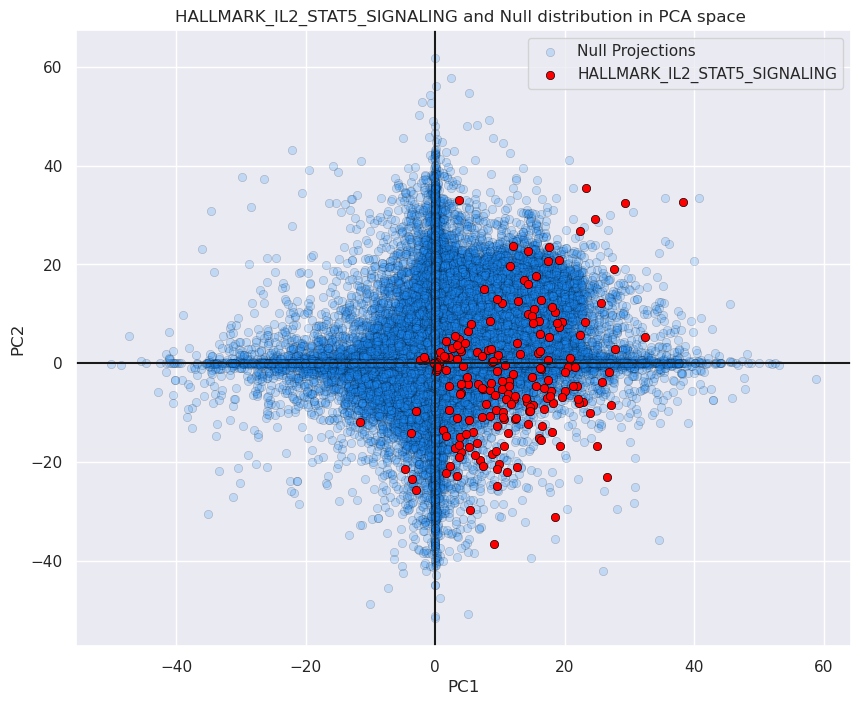

In [48]:
geneset_name = 'HALLMARK_IL2_STAT5_SIGNALING'

roma.pl.adata = roma.adata

roma.pl.gene_projections(geneset_name)

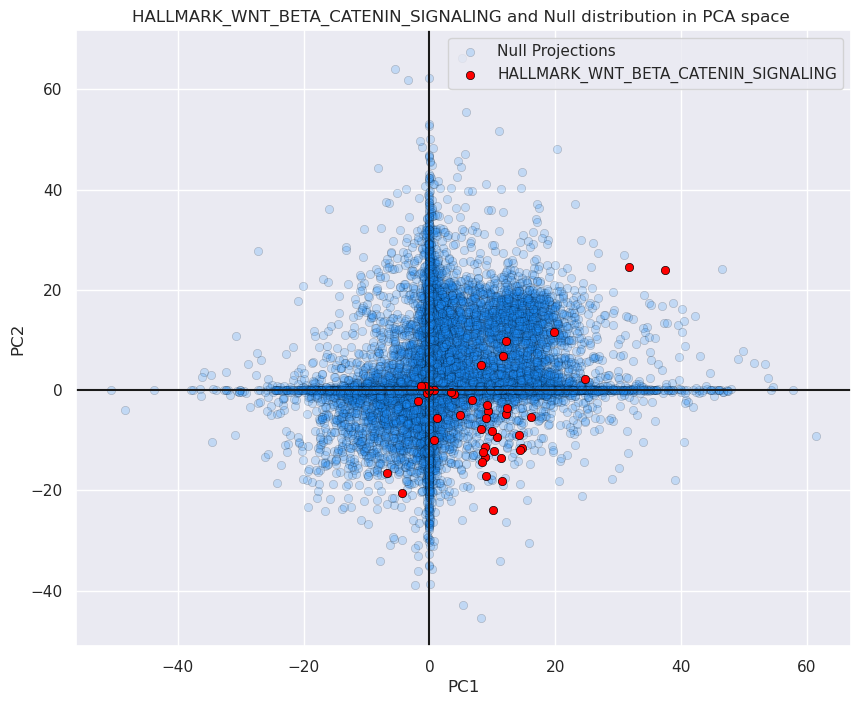

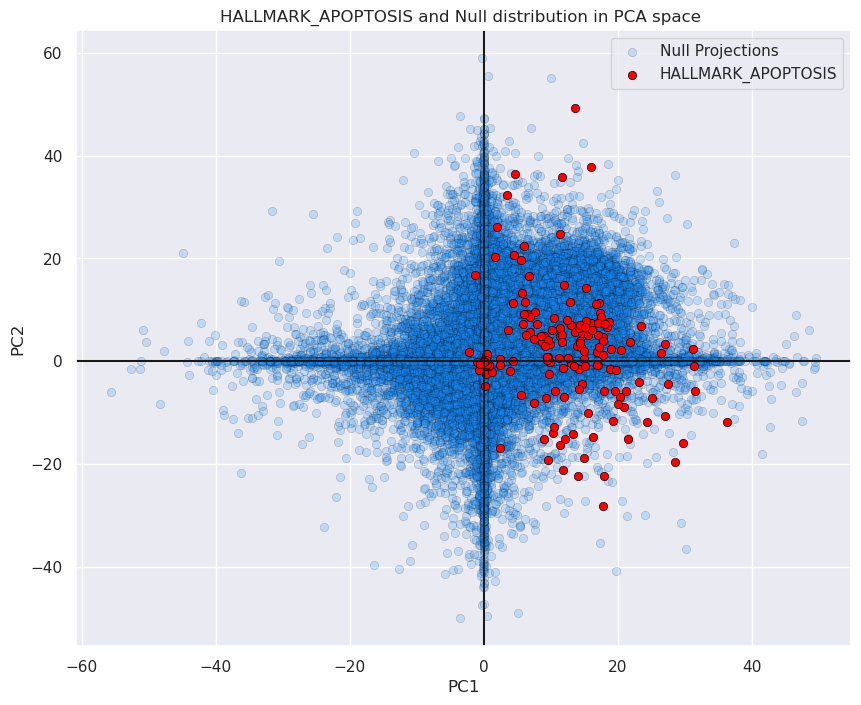

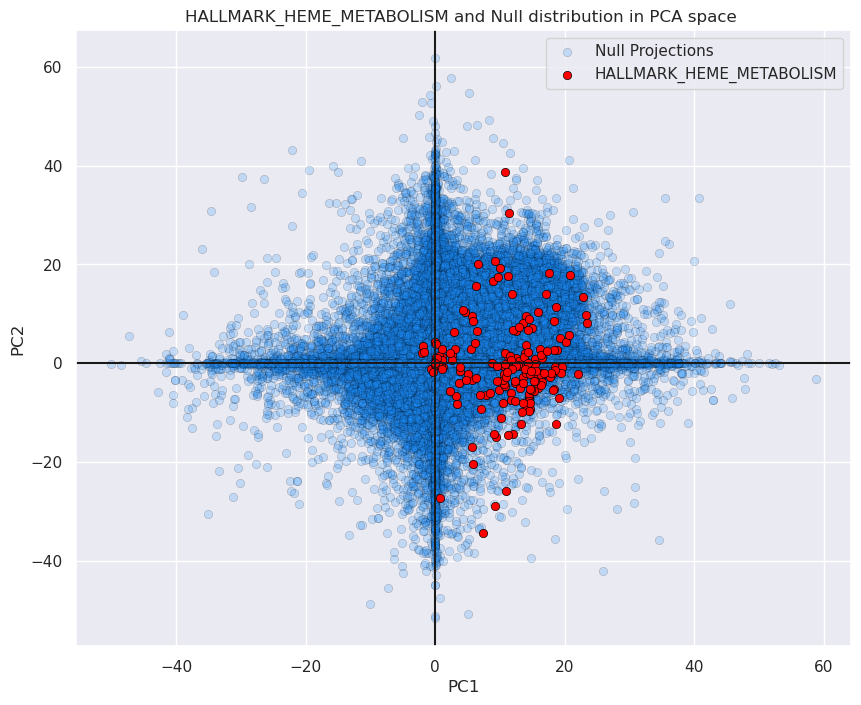

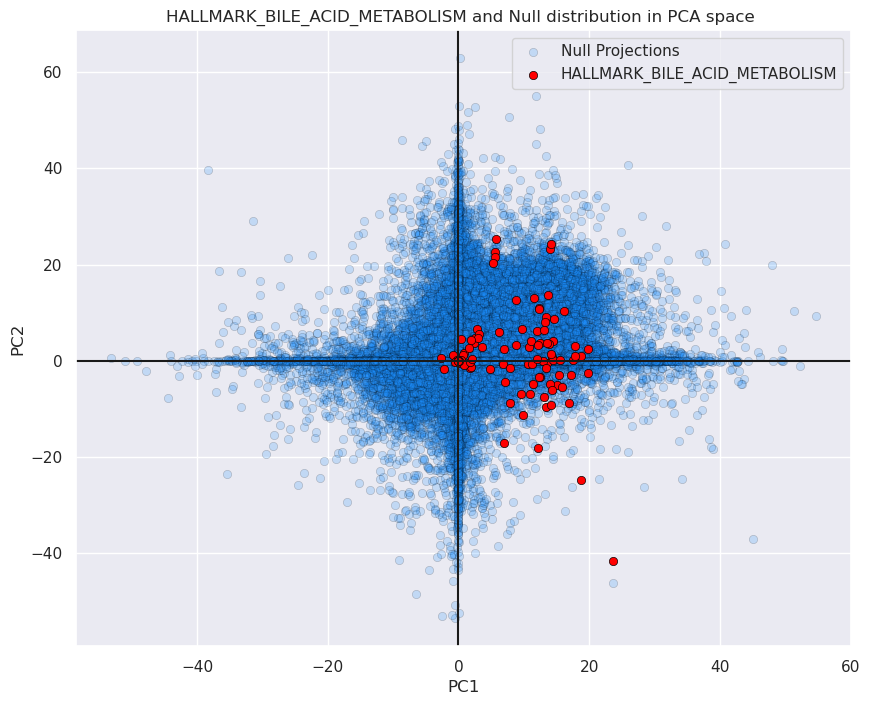

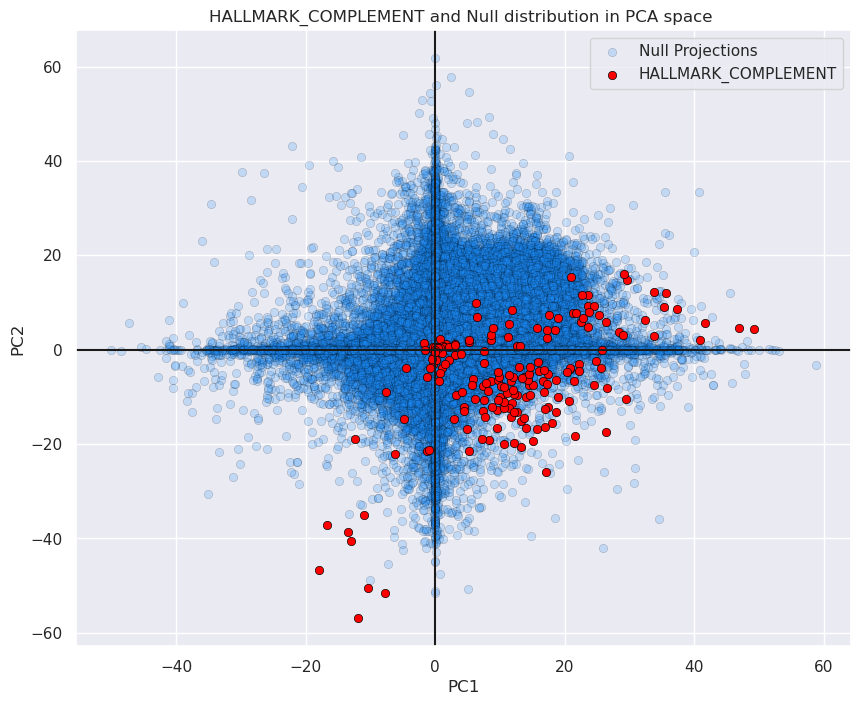

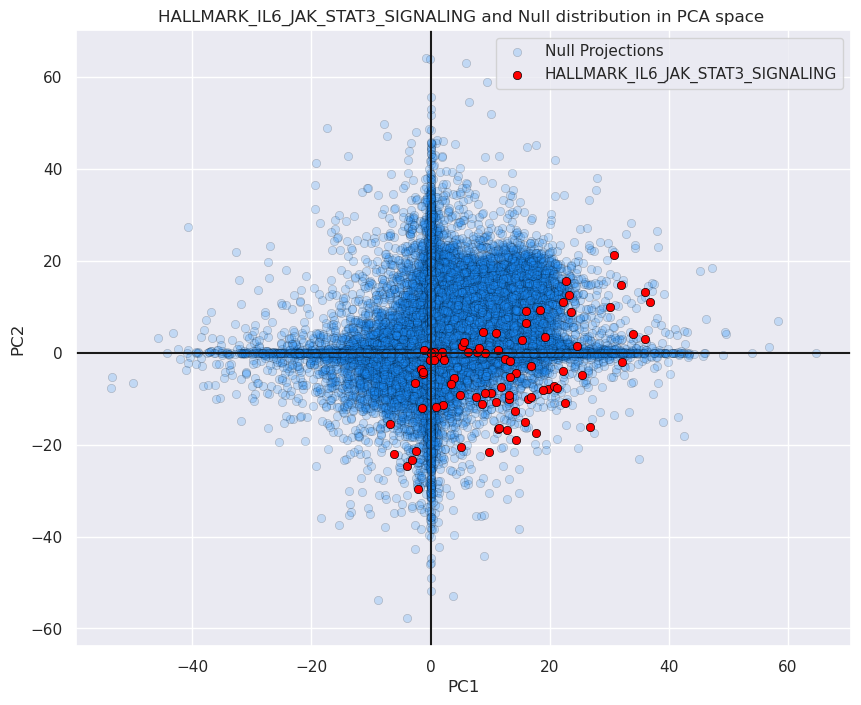

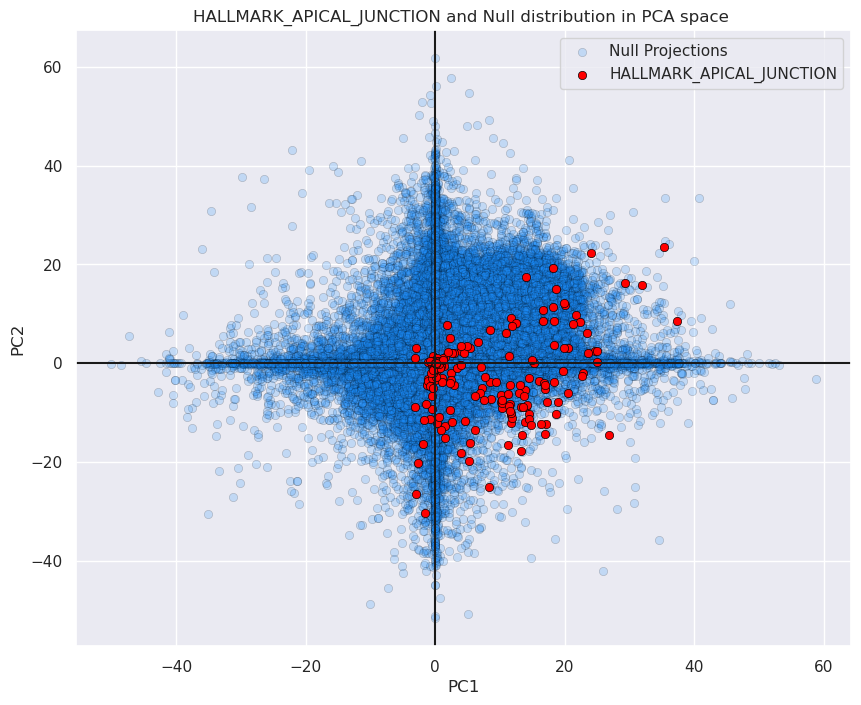

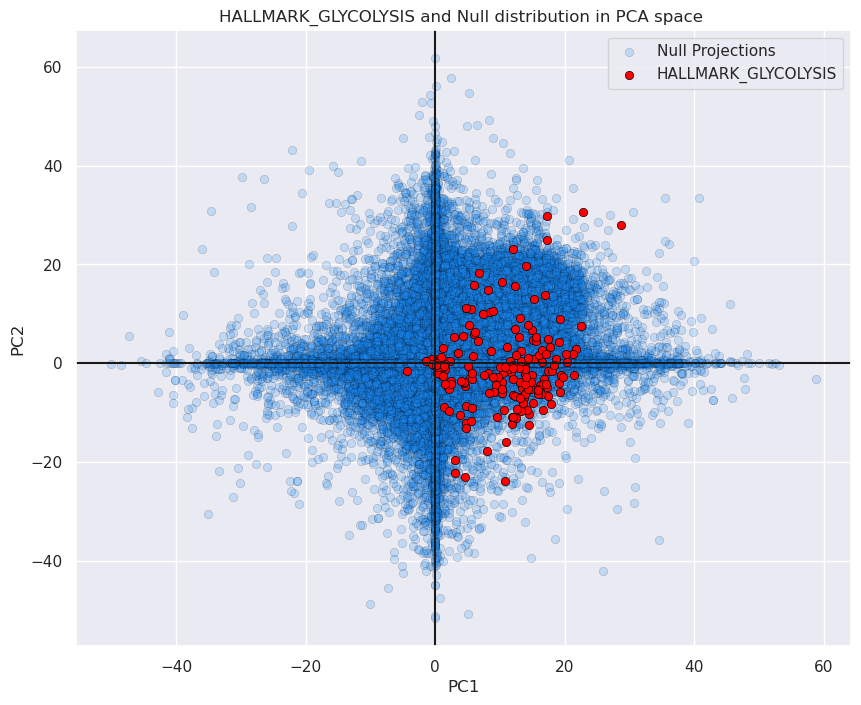

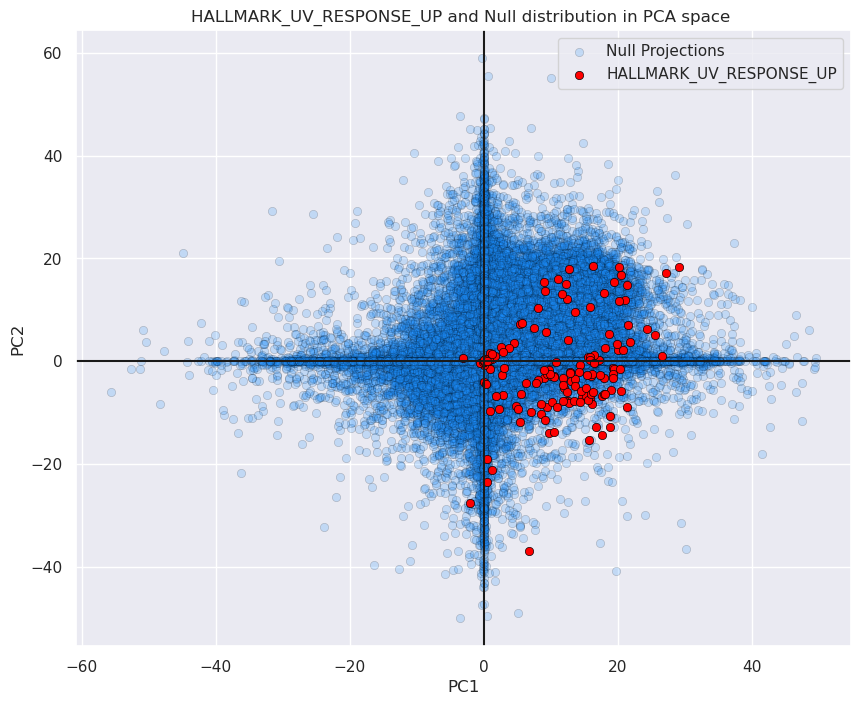

In [117]:
for geneset_name in difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()[1:]:
    roma.pl.gene_projections(geneset_name)

In [121]:
# Low differences in L1 setup 

In [118]:
difference_df.sort_values(by='L1 R-py', ascending=True).head(10)

L1 R-py  Median Exp R-py  \
HALLMARK_ALLOGRAFT_REJECTION                0.000723         2.663761   
HALLMARK_MYC_TARGETS_V2                     0.001387         4.130248   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.001820         1.381529   
HALLMARK_FATTY_ACID_METABOLISM              0.003298         4.771591   
HALLMARK_MYC_TARGETS_V1                     0.003615        25.982232   
HALLMARK_E2F_TARGETS                        0.003916         4.553439   
HALLMARK_PROTEIN_SECRETION                  0.004101        25.986316   
HALLMARK_DNA_REPAIR                         0.004441        24.380214   
HALLMARK_PANCREAS_BETA_CELLS                0.004544         0.481532   
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.005069         4.257707   

                                            p_value L1 R-py  \
HALLMARK_ALLOGRAFT_REJECTION                            0.5   
HALLMARK_MYC_TARGETS_V2                                 0.0   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION              0.0   
HALLMARK_FATTY_ACID_METABOLISM                          0.0   
HALLMARK_MYC_TARGETS_V1                                 0.0   
HALLMARK_E2F_TARGETS                                    0.0   
HALLMARK_PROTEIN_SECRETION                              0.0   
HALLMARK_DNA_REPAIR                                     0.0   
HALLMARK_PANCREAS_BETA_CELLS                            0.0   
HALLMARK_INTERFERON_ALPHA_RESPONSE                      0.0   

                                            q_value Med Exp R-py  \
HALLMARK_ALLOGRAFT_REJECTION                            0.985104   
HALLMARK_MYC_TARGETS_V2                                 0.001314   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION              0.030344   
HALLMARK_FATTY_ACID_METABOLISM                          0.001314   
HALLMARK_MYC_TARGETS_V1                                 0.001314   
HALLMARK_E2F_TARGETS                                    0.001314   
HALLMARK_PROTEIN_SECRETION                              0.001314   
HALLMARK_DNA_REPAIR                                     0.001314   
HALLMARK_PANCREAS_BETA_CELLS                            0.030344   
HALLMARK_INTERFERON_ALPHA_RESPONSE                      0.001314   

                                            non_adj_p_L1 R-py  
HALLMARK_ALLOGRAFT_REJECTION                         0.323333  
HALLMARK_MYC_TARGETS_V2                              0.050000  
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION           0.266667  
HALLMARK_FATTY_ACID_METABOLISM                       0.000000  
HALLMARK_MYC_TARGETS_V1                              0.000000  
HALLMARK_E2F_TARGETS                                 0.000000  
HALLMARK_PROTEIN_SECRETION                           0.000000  
HALLMARK_DNA_REPAIR                                  0.000000  
HALLMARK_PANCREAS_BETA_CELLS                         0.083333  
HALLMARK_INTERFERON_ALPHA_RESPONSE                   0.000000

In [119]:
difference_df.sort_values(by='L1 R-py', ascending=True).head(10).index.tolist()

['HALLMARK_ALLOGRAFT_REJECTION',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
 'HALLMARK_FATTY_ACID_METABOLISM',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_E2F_TARGETS',
 'HALLMARK_PROTEIN_SECRETION',
 'HALLMARK_DNA_REPAIR',
 'HALLMARK_PANCREAS_BETA_CELLS',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE']

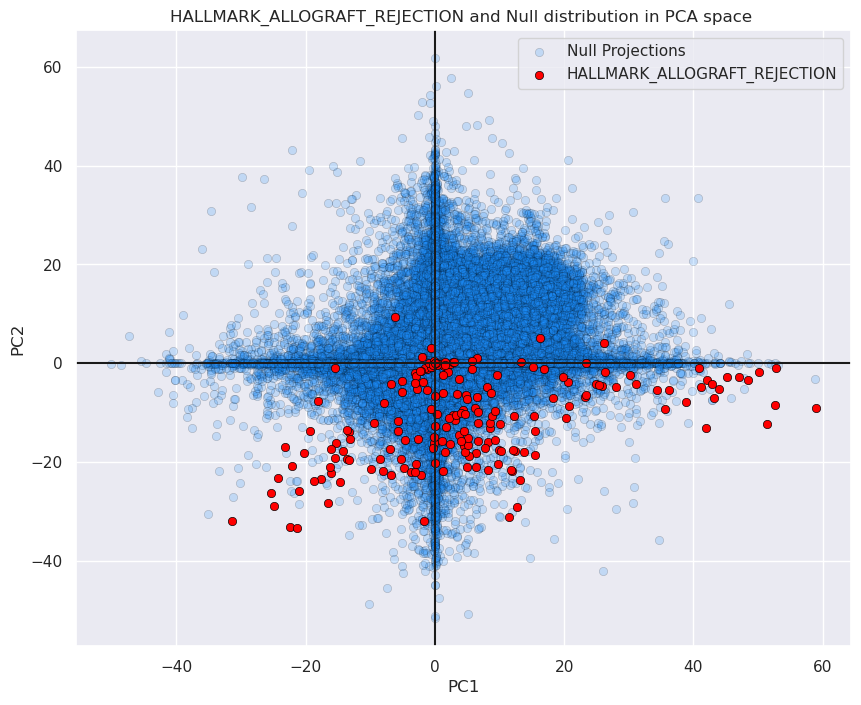

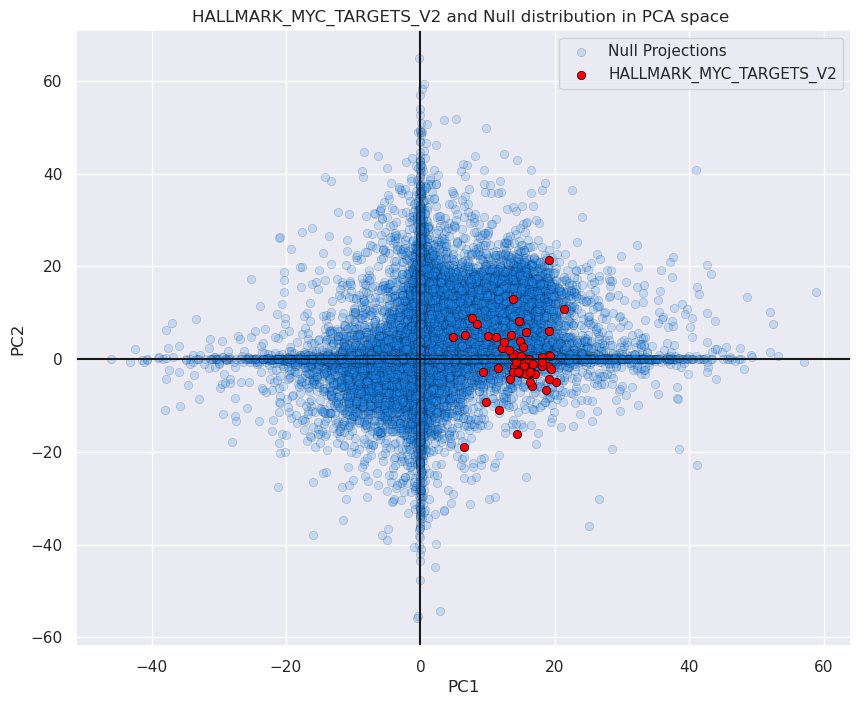

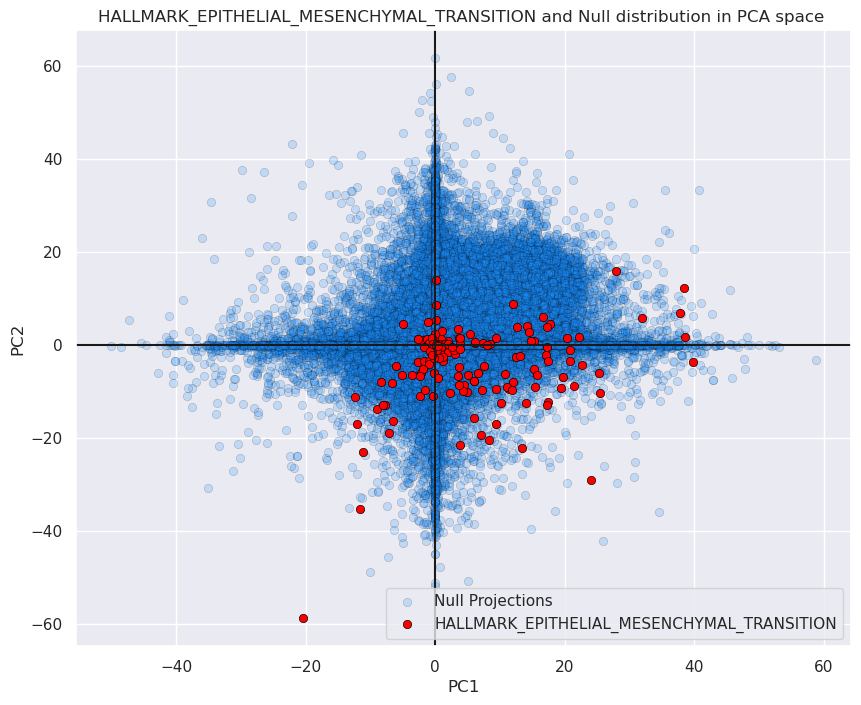

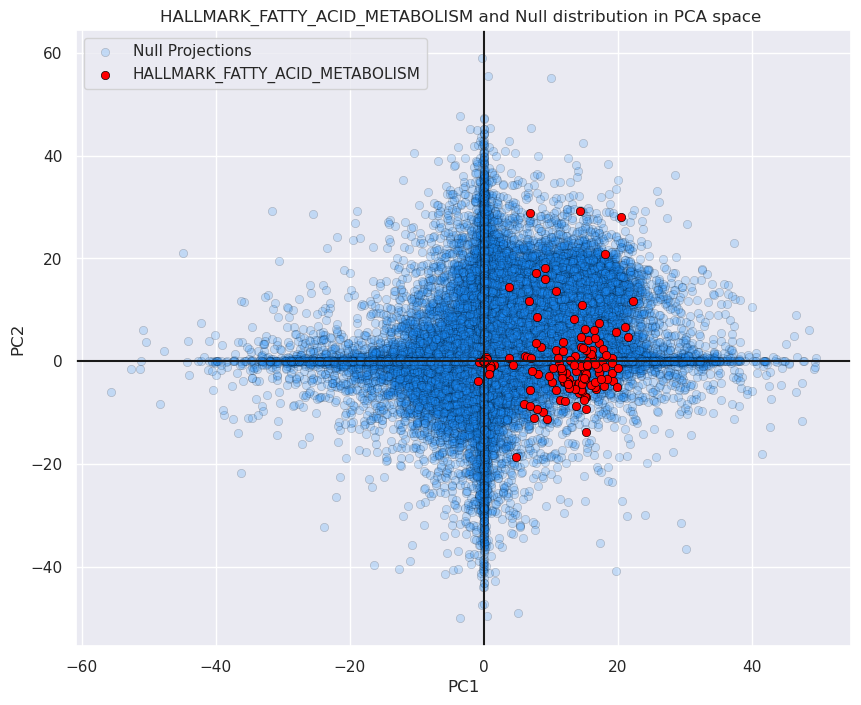

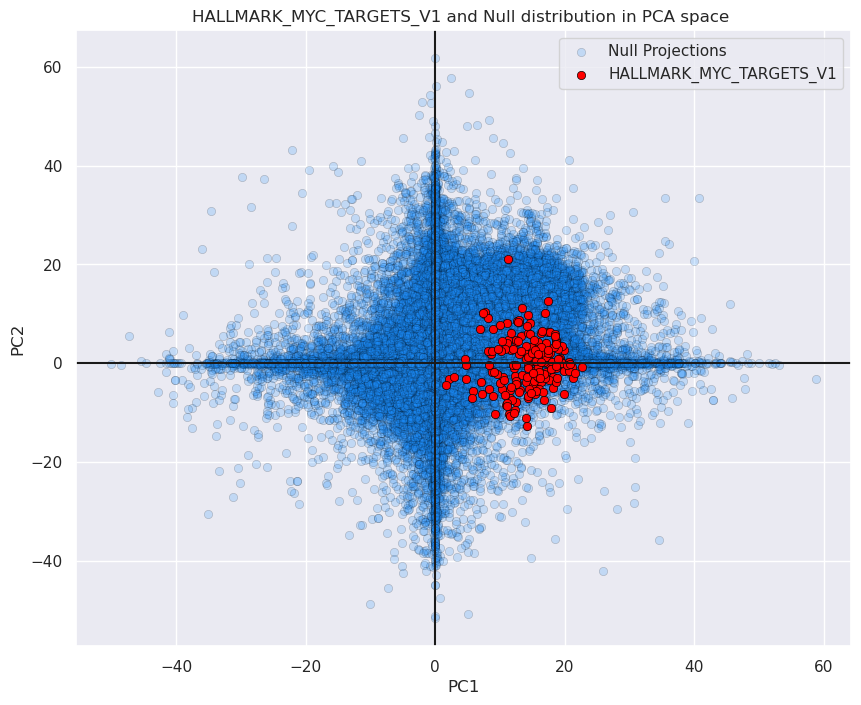

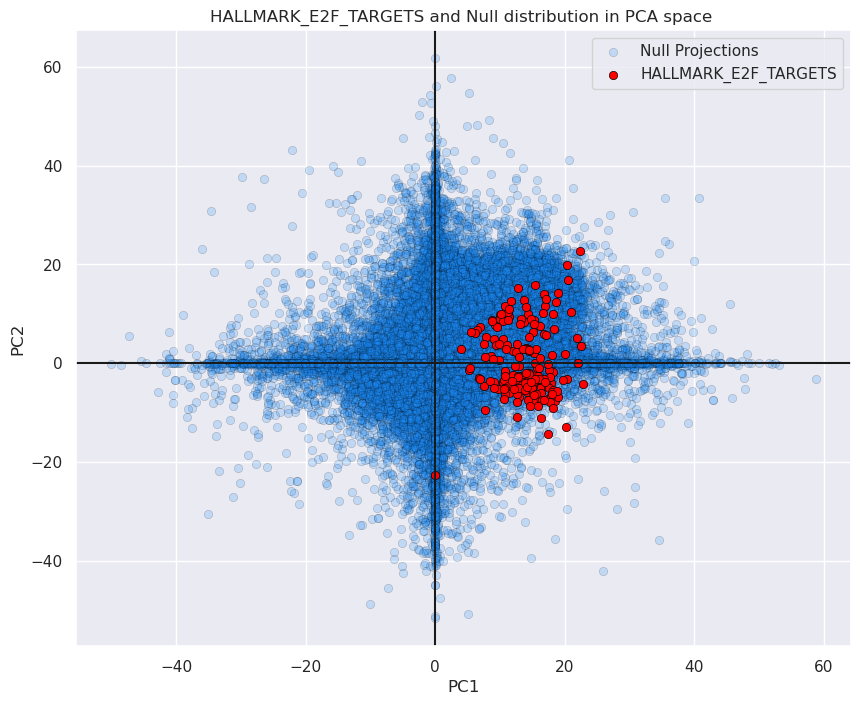

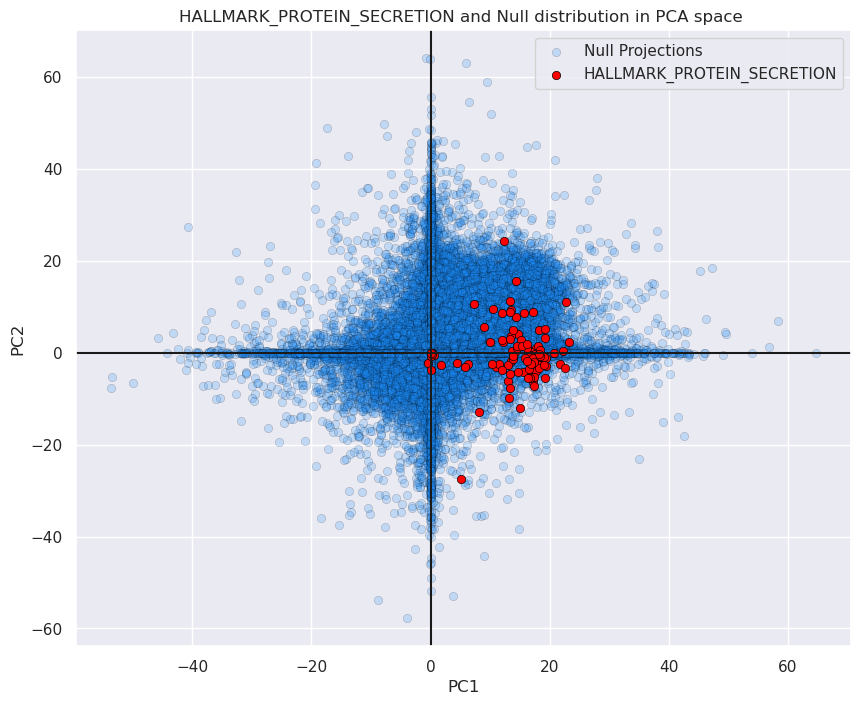

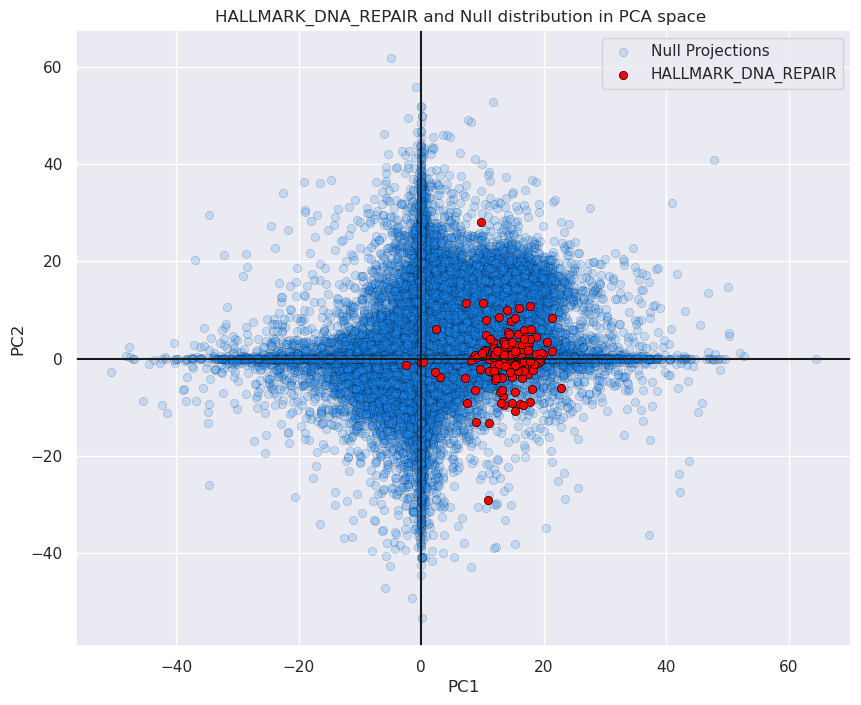

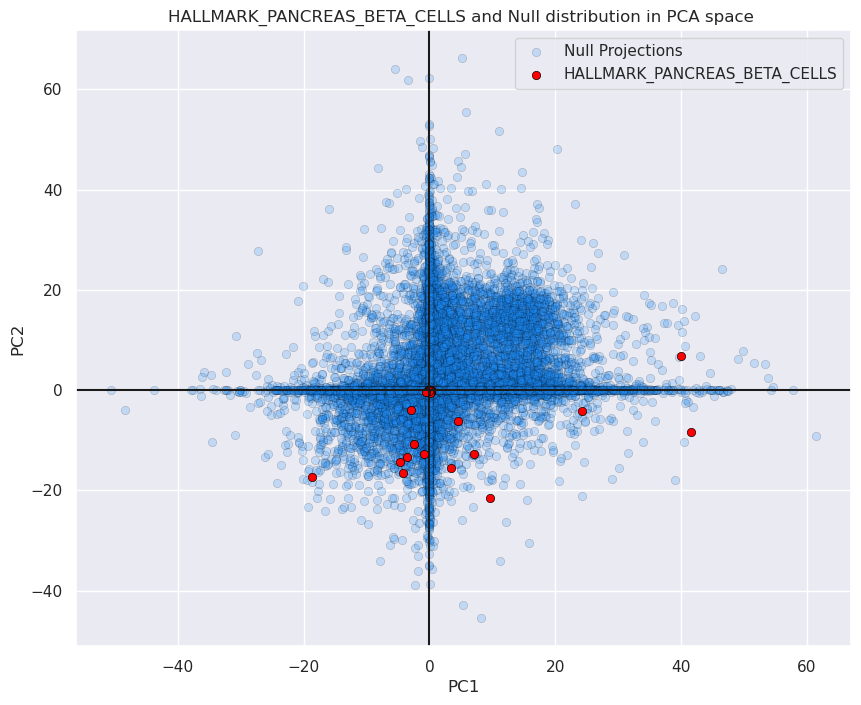

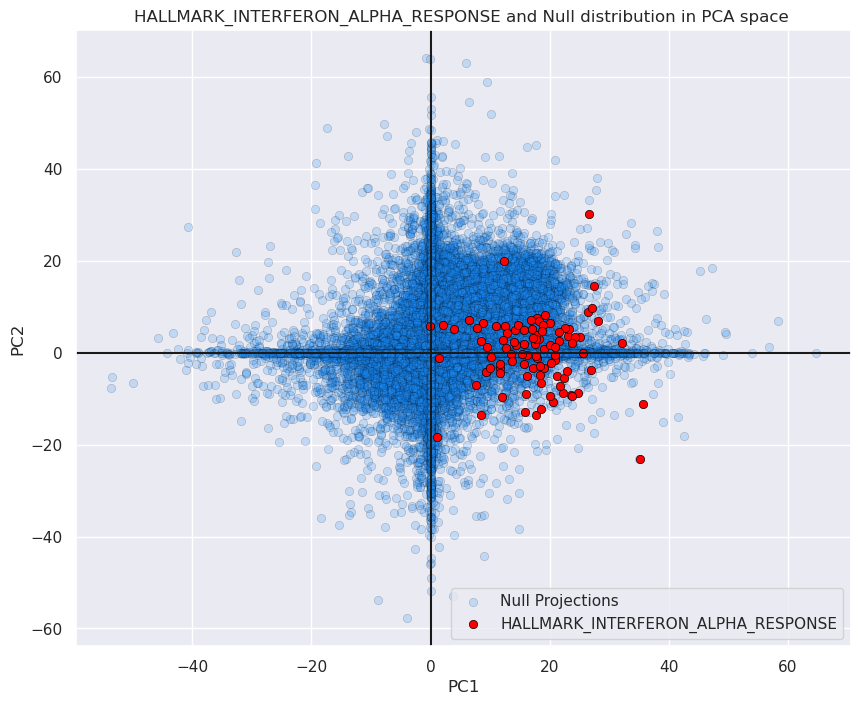

In [120]:
for geneset_name in difference_df.sort_values(by='L1 R-py', ascending=True).head(10).index.tolist():
    roma.pl.gene_projections(geneset_name)